In [1]:
from tdse.propagator.spherical import Propagator_on_Spherical_Box_with_single_m

prop = Propagator_on_Spherical_Box_with_single_m(
    Nr=51, dr=0.2, m=0, lmax=0, Vr=0.0)

In [2]:
wf_t0 = prop.propagate_to_ground_state(norm_thres=1e-10)

iteration count at end: 71


In [3]:
wf = wf_t0.copy()

In [4]:
Rlm = prop.wf.wf2Rlm(wf)

In [16]:
prop.wf.eval_wf_with_wf_deriv_at_q([3.1, 1.8, 0.0], Rlm)

((0.014371910463708564+0j),
 array([-0.00144066+0.j,  0.        +0.j,  0.        +0.j]))

In [13]:
import numpy as np
# from numpy import pi

In [43]:
r_arr = np.linspace(0., prop.wf.r_max-1e-8, num=21)
theta_arr = np.linspace(0., pi, num=29)
phi = 0.0

In [44]:
wf_sph = np.empty((r_arr.size, theta_arr.size), dtype=np.complex)
dq_wf_sph = np.empty((prop.wf.dim, r_arr.size, theta_arr.size), dtype=np.complex)
for ind in np.ndindex(*wf_sph.shape):
    r, theta = r_arr[ind[0]], theta_arr[ind[1]]
    wf_sph[ind], dq_wf_sph[np.index_exp[:]+ind] = prop.wf.eval_wf_with_wf_deriv_at_q([r,theta,phi], Rlm)

In [45]:
from vis.plot import construct_polar_mesh_for_colormesh
r_cmesh, theta_cmesh = construct_polar_mesh_for_colormesh(r_arr, theta_arr)

In [46]:
import matplotlib.pyplot as plt

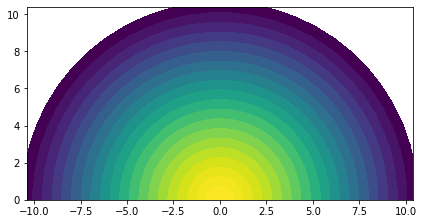

In [48]:
fig, ax = plt.subplots()
ax.pcolormesh(r_cmesh, theta_cmesh, wf_sph.real)
ax.set_aspect(1.0)
ax.set_ylim(0,r_arr[-1]), ax.set_xlim(-r_arr[-1],r_arr[-1])
fig.tight_layout()
# fig.savefig("wf-interp-test-2.png")

In [49]:
from tdse.analytic import spherical_jn_zeros

jl_zero_1 = spherical_jn_zeros(0, 1)

In [65]:
from scipy.special import spherical_jn

R00 = spherical_jn(0, (jl_zero_1 / prop.r_max) * r_arr)
g00 = r_arr * R00
# prop.wf_class.normalize(g00, prop.dr)

In [66]:
R00

array([1.00000000e+00, 9.95892735e-01, 9.83631643e-01, 9.63397762e-01,
       9.35489284e-01, 9.00316316e-01, 8.58393692e-01, 8.10331958e-01,
       7.56826729e-01, 6.98646586e-01, 6.36619773e-01, 5.71619934e-01,
       5.04551153e-01, 4.36332594e-01, 3.67883011e-01, 3.00105440e-01,
       2.33872322e-01, 1.70011371e-01, 1.09292406e-01, 5.24154081e-02,
       9.61538546e-10])

In [67]:
wf_sph[:,0]

array([1.67275332e-02+0.j, 1.66386827e-02+0.j, 1.64339983e-02+0.j,
       1.60962066e-02+0.j, 1.56302705e-02+0.j, 1.50430186e-02+0.j,
       1.43430210e-02+0.j, 1.35404507e-02+0.j, 1.26468978e-02+0.j,
       1.16751757e-02+0.j, 1.06390992e-02+0.j, 9.55324616e-03+0.j,
       8.43271178e-03+0.j, 7.29284980e-03+0.j, 6.14901553e-03+0.j,
       5.01630810e-03+0.j, 3.90932353e-03+0.j, 2.84191278e-03+0.j,
       1.82696457e-03+0.j, 8.76201199e-04+0.j, 1.60731545e-11+0.j])

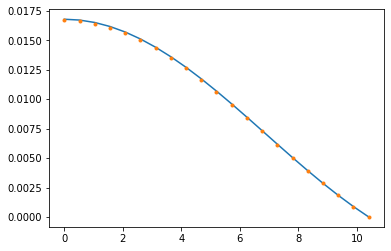

In [77]:
fig, ax = plt.subplots()
ax.plot(r_arr, R00*0.0168)
ax.plot(r_arr, wf_sph[:,0].real, '.')

In [15]:
from importlib import reload

import tdse.propagator.spherical
reload(tdse.propagator.spherical)
import tdse.propagator._base
reload(tdse.propagator._base)

<module 'tdse.propagator._base' from '/home/ahn/Dropbox/py/proj/tdse/tdse/propagator/_base.py'>